<a href="https://colab.research.google.com/github/chione-tes/Machine-Learning/blob/main/Power_plant_polynomialreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
power_plant = fetch_ucirepo(id=294)

# data (as pandas dataframes)
X =power_plant.data.features
y =power_plant.data.targets

# metadata
print(power_plant.metadata)

# variable information
print(power_plant.variables)


{'uci_id': 294, 'name': 'Combined Cycle Power Plant', 'repository_url': 'https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant', 'data_url': 'https://archive.ics.uci.edu/static/public/294/data.csv', 'abstract': 'The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 9568, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['PE'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5002N', 'creators': ['Pnar Tfekci', 'Heysem Kaya'], 'intro_paper': {'ID': 406, 'type': 'NATIVE', 'title': 'Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods', 'aut

In [ ]:
print(X.head())

print(y.head())


      AT      V       AP     RH
0  14.96  41.76  1024.07  73.17
1  25.18  62.96  1020.04  59.08
2   5.11  39.40  1012.16  92.14
3  20.86  57.32  1010.24  76.64
4  10.82  37.50  1009.23  96.62
       PE
0  463.26
1  444.37
2  488.56
3  446.48
4  473.90


In [ ]:
#train-test split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7654, 4)
(1914, 4)
(7654, 1)
(1914, 1)


In [ ]:
# Create pipeline (works with DataFrames)
model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    LinearRegression()
)

# Train model
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
# Evaluate
y_test_pred = model.predict(X_test)
y_train_pred=model.predict(X_train)
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))



Train MSE: 18.159543811418324
Test MSE: 17.903054163851934


In [ ]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Train R2:", train_r2)
print("Test R2:", test_r2)

Train R2: 0.9377092268931408
Test R2: 0.9382776706597628


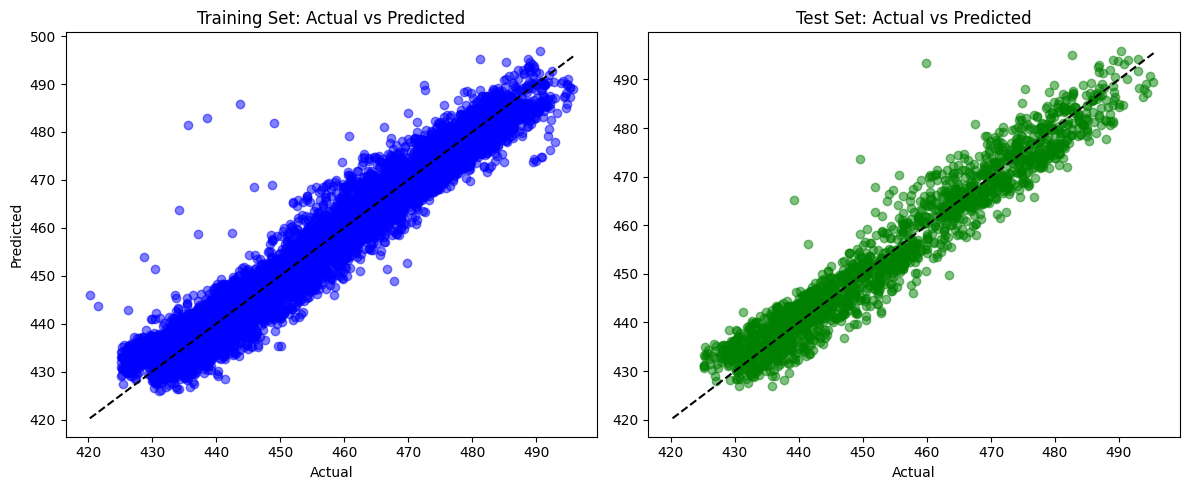

In [ ]:
plt.figure(figsize=(12, 5))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual')

plt.tight_layout()
plt.show()